# FINANCIAL ENGINEERING PROJECT
# Topic: CURRENCY OPTION CALL
## My Duong Nguyen (ID: 243521) & Thi Dieu Huong Nguyen (ID: 244531)

In [1]:
import pandas as pd
import numpy as np
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats.mstats import chisquare
from scipy.stats import lognorm
import statsmodels.api as sm
from scipy.stats import shapiro
import scipy.stats as si
import seaborn as sns
from scipy.stats import chi2_contingency

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


# 1. Loading time-series data of EURO-USD

## 1.1 One year data 

In [2]:
df_1y = yf.download('EURUSD=X', start='2022-05-31', end='2023-05-31')
df_1y['Log Return'] = np.log(df_1y['Adj Close']/df_1y['Adj Close'].shift(1))
df_1y

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Log Return
Date,,,,,,,
2022-05-31,1.077354,1.077493,1.068216,1.077354,1.077354,0,NaN
2022-06-01,1.073411,1.073664,1.063174,1.073411,1.073411,0,-0.003667
2022-06-02,1.065417,1.073849,1.064566,1.065417,1.065417,0,-0.007475
2022-06-03,1.075107,1.076542,1.070664,1.075107,1.075107,0,0.009054
2022-06-06,1.072605,1.075269,1.068604,1.072605,1.072605,0,-0.002330
...,...,...,...,...,...,...,...
2023-05-24,1.076971,1.079937,1.074968,1.076971,1.076971,0,-0.003831
2023-05-25,1.075732,1.075419,1.070996,1.075732,1.075732,0,-0.001152
2023-05-26,1.072444,1.075755,1.070205,1.072444,1.072444,0,-0.003061


## 1.2 Two years data

In [3]:
df_2y = yf.download('EURUSD=X', start='2021-05-31', end='2023-05-31')
df_2y['Log Return'] = np.log(df_2y['Adj Close']/df_2y['Adj Close'].shift(1))
df_2y

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Log Return
Date,,,,,,,
2021-05-31,1.219007,1.223391,1.218413,1.219007,1.219007,0,NaN
2021-06-01,1.223406,1.225415,1.221464,1.223287,1.223287,0,0.003505
2021-06-02,1.221807,1.222942,1.216575,1.221777,1.221777,0,-0.001235
2021-06-03,1.221150,1.221598,1.212090,1.220986,1.220986,0,-0.000647
2021-06-04,1.213030,1.218769,1.210551,1.213301,1.213301,0,-0.006314
...,...,...,...,...,...,...,...
2023-05-24,1.076971,1.079937,1.074968,1.076971,1.076971,0,-0.003831
2023-05-25,1.075732,1.075419,1.070996,1.075732,1.075732,0,-0.001152
2023-05-26,1.072444,1.075755,1.070205,1.072444,1.072444,0,-0.003061


## 1.3 Ten years data

In [4]:
df_10y = yf.download('EURUSD=X', start='2013-05-31', end='2023-05-31')
df_10y['Log Return'] = np.log(df_10y['Adj Close']/df_10y['Adj Close'].shift(1))
df_10y

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Log Return
Date,,,,,,,
2013-05-31,1.304308,1.304938,1.294679,1.304393,1.304393,0,NaN
2013-06-03,1.299511,1.310360,1.295706,1.299646,1.299646,0,-0.003646
2013-06-04,1.307292,1.309819,1.304480,1.307292,1.307292,0,0.005866
2013-06-05,1.307292,1.311211,1.305688,1.307343,1.307343,0,0.000039
2013-06-06,1.309312,1.327200,1.307617,1.309329,1.309329,0,0.001518
...,...,...,...,...,...,...,...
2023-05-24,1.076971,1.079937,1.074968,1.076971,1.076971,0,-0.003831
2023-05-25,1.075732,1.075419,1.070996,1.075732,1.075732,0,-0.001152
2023-05-26,1.072444,1.075755,1.070205,1.072444,1.072444,0,-0.003061


# 2. Analyzing whether time-series follow geometric Brownian Motion (GBM)

## 2.1 Methodology

In real life, the GBM is used often without examining whether the data set is valid for the condition of GBM. In fact, there are two main steps to test for GBM, which were stated by Marathe and Ryan (2005). In addition, we are adding another method to visually assess the constancy of  variance and the continuity of the times series.

### 2.1.1 Normality test

Based on the property of geometric Brownian Motion: random variables are normaly distributed (Lyuu, 2002, p. 183), it is neccessary to check the distribution of all the variables. Plotting a histogram of log return and see if it is similar to normal distribution plot is the most transparent way to decide for Normality test. Another visual way could be to have a Q-Q plot that is related to a straight line.

Statistically, Shapiro-Wilk test (Shapiro & Wilk, 1965) is the most used the goodness-of-fit test. In this case, we have:


$H_0$: The following data satisfy normal distribution <br>
$H_a$: The following data do not satisfy normal distribution



### 2.1.2 Independence test

Since geometric Brownian Motion is a Brownian Motion, it has the same property of Brownian Motion: the independent increments if for all $0<=t_0<t_1<...t_m$ (Lyuu, 2002, p. 183). The Chi-square two-way test (Cochran, 1952) is suitable for the Independence test. In our case, this test will determine if each variable is depend or not on one another. Those hypothesis have to be follow:

$H_0$: Between each variable, there exists no relation <br>
$H_a$: Between each variable, there exists relation

We are testing the Independence test using the method from Marathe and Ryan (2005). By that, we create a histogram including 4 bin for all of the returns. We then create the 4 by 4 matrix, the rows represent the rank of histogram in time t, columns are the rank of histogram in time t+1, and each cell of the matrix are the number of time the returns exist. Lastly we calculate the p-value of the 2 tails Chi-square test. 

### 2.1.3 Constant variance and continuity assessment

Since geometric Brownian motion (GBM) is a continuous-time process with drift (Lyuu, 2002, p. 183-187). Therefore, if a times series $S_t$ is said to follow a GBM, it must satisfy the following stochastic differential equation:  

$$\begin{equation}  dS_t = \mu S_t dt + \sigma S_t dW_t \end{equation}$$

where:  
$W_t$ is a Wiener process or Brownian motion, and $\mu$  ('the percentage drift') and $\sigma$  ('the percentage volatility') are constants.  

Hence, the visualization of constant variance and continuity of a times series can be considered as indicators for checking whether the call option price on currencies within different periods follows geometric Brownian Motion.


## 2.2 Result

### 2.2.1 Normality

#### 2.2.1.1 Histogram plot

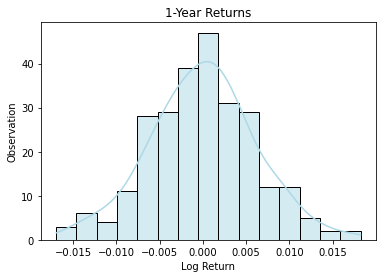

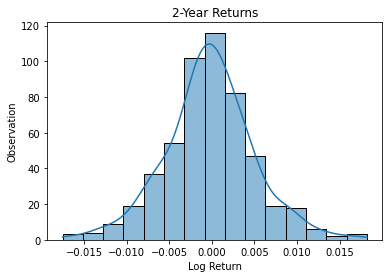

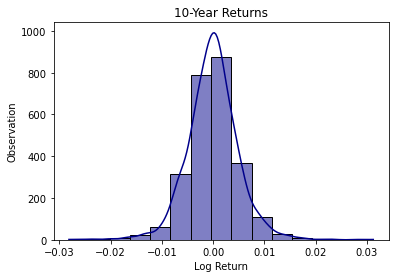

In [5]:
sns.histplot(df_1y['Log Return'], bins=15, color='lightblue', kde=True).set(title='1-Year Returns', ylabel='Observation')
plt.show()

sns.histplot(df_2y['Log Return'], bins=15, kde=True).set(title='2-Year Returns', ylabel='Observation')
plt.show()

sns.histplot(df_10y['Log Return'], bins=15, color='darkblue', kde=True).set(title='10-Year Returns', ylabel='Observation')
plt.show()

plt.rcParams["figure.figsize"] = (3,2)

*From the graph, it is evident that the three log-transformed time-series of 1-returns, 2-year returns and 3-year returns, respectively, follow normal distribution since the highest frequency variables are centered at the mid-point. In addition, the more higher/lower the variables get, the less frequent it appears.*

#### 2.2.1.2 Q-Q plot

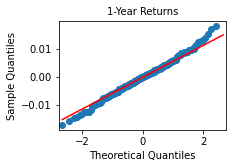

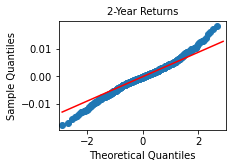

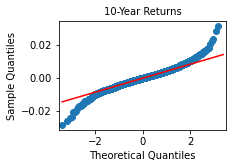

In [6]:
fig = sm.qqplot(df_1y['Log Return'], line='q')
plt.title('1-Year Returns', fontsize = 10)
plt.show()

fig = sm.qqplot(df_2y['Log Return'], line='q')
plt.title('2-Year Returns', fontsize = 10)
plt.show()

fig = sm.qqplot(df_10y['Log Return'] , line='q')
plt.title('10-Year Returns', fontsize = 10)
plt.show()

plt.rcParams["figure.figsize"] = (2,2)

*We can conclude that the 1-year time-series follows normal distribution since the plotting of variables lie on a straight line. However, the 2-year time series and the 10-year time series do not follow the trend. Therefore, we need further test to conclude if the two year and ten year time-series follow normal distribution.*

#### 2.2.1.3 Shapiro-Wilk test

In [7]:
shapiro(df_1y['Log Return'][1:])

ShapiroResult(statistic=0.996870219707489, pvalue=0.8924320340156555)

In [8]:
shapiro(df_2y['Log Return'][1:])

ShapiroResult(statistic=0.9892958998680115, pvalue=0.0007500035571865737)

In [9]:
shapiro(df_10y['Log Return'][1:])

ShapiroResult(statistic=0.9723204374313354, pvalue=4.872138741454494e-22)


| Period | W | P-value| Decision|
|:--------:|:-:|:------:|:-------:|
|1 year|0.9969|0.8924|Fail to reject $H_0$|
|2 years|0.9893|0.0007|Reject $H_0$|
|10 years|0.9723|4.8721.e<sup>-22</sup>|Reject $H_0$ |

*With p-value > 5% ($\alpha$ =0.05), the 1-year time-series of EURO-USD is relevant for normal distribution.
In contrast, the 2-year time-series of EURO-USD is not relevant for normal distribution since its p-value is lower than 5%. The 10-year time-series followed the same pattern as that of the 2-year time series.*

### 2.2.2 Independence test

##### Chi-square test ($x$<sup>2</sup>)

In [10]:
gap = np.histogram(df_1y['Log Return'][1:], bins=4)[1]  # Adjust the number of bins as needed
cont_table = np.zeros((len(gap)-1, len(gap)-1))
for i in range(len(df_1y['Log Return'][1:])-1):
    current_gap = np.digitize(df_1y['Log Return'][1:][i], gap) - 1
    next_gap = np.digitize(df_1y['Log Return'][1:][i+1], gap) - 1
    if current_gap < len(gap)-1 and next_gap < len(gap)-1:
        cont_table[current_gap, next_gap] += 1
chi2, p_value, _, _ = chi2_contingency(cont_table)
print("Chi-square:", chi2)
print("p-value:", p_value)

Chi-square: 1.0338929568984536e+01
p-value: 0.323750072973502


In [11]:
gap = np.histogram(df_2y['Log Return'][1:], bins=4)[1]  # Adjust the number of bins as needed
cont_table = np.zeros((len(gap)-1, len(gap)-1))
for i in range(len(df_2y['Log Return'][1:])-1):
    current_gap = np.digitize(df_2y['Log Return'][1:][i], gap) - 1
    next_gap = np.digitize(df_2y['Log Return'][1:][i+1], gap) - 1
    if current_gap < len(gap)-1 and next_gap < len(gap)-1:
        cont_table[current_gap, next_gap] += 1
chi2, p_value, _, _ = chi2_contingency(cont_table)
print("Chi-square:", chi2)
print("p-value:", p_value)

Chi-square: 10.279210758861097
p-value: 0.3283580843318307


In [12]:
gap = np.histogram(df_10y['Log Return'][1:], bins=4)[1]  # Adjust the number of bins as needed
cont_table = np.zeros((len(gap)-1, len(gap)-1))
for i in range(len(df_10y['Log Return'][1:])-1):
    current_gap = np.digitize(df_10y['Log Return'][1:][i], gap) - 1
    next_gap = np.digitize(df_10y['Log Return'][1:][i+1], gap) - 1
    if current_gap < len(gap)-1 and next_gap < len(gap)-1:
        cont_table[current_gap, next_gap] += 1
chi2, p_value, _, _ = chi2_contingency(cont_table)
print("Chi-square:", chi2)
print("p-value:", p_value)

Chi-square: 18.317037224047652
p-value: 0.031668502215152744


| Period | $x$<sup>2</sup> | P-value| Decision|
|:--------:|:-:|:------:|:-------:|
|1 year|1.03|0.3238|Fail to reject $H_0$|
|2 years|10.28|0.3284|Fail to reject $H_0$|
|10 years|18.32|0.0317|Reject $H_0$ |

*The p-values of 1 year period and 2 year period are greater than $\alpha$ = 0.05. This indicates that the test is not significant; in other words, the test fails to reject the null hypothesis. Therefore, variables of those time-series of EURO-USD are independent.*

*On the other hand, the 10-year period achieve $\alpha$ < 0.05. In this case, we reject the null hypothesis. For that, this period of 10 year time-series of EURO-USD is not independent.*

### 2.2.3 Constant variance and continuity assessment

Firstly, the line plot of the currency price (Closing price) is drawn. *[a]*

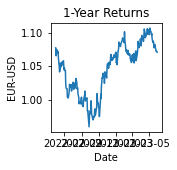

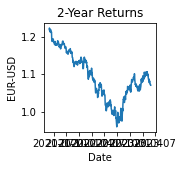

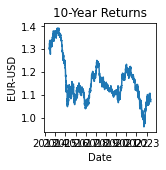

In [13]:
import seaborn as sns

sns.lineplot(x='Date', y='Adj Close', data = df_1y).set(title='1-Year Returns', ylabel='EUR-USD')
plt.show()

sns.lineplot( x='Date', y='Adj Close', data = df_2y).set(title='2-Year Returns', ylabel='EUR-USD')
plt.show()

sns.lineplot( x='Date', y='Adj Close', data = df_10y).set(title='10-Year Returns', ylabel='EUR-USD')
plt.show()

plt.rcParams["figure.figsize"] = (7,1)

Next, line plot of the log returns is drawn. *[b]*

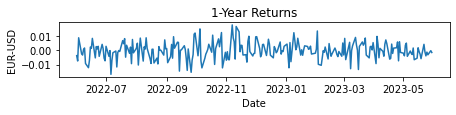

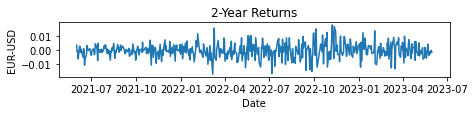

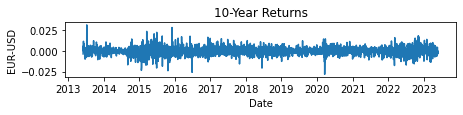

In [14]:
sns.lineplot(x='Date', y='Log Return', data = df_1y).set(title='1-Year Returns', ylabel='EUR-USD')
plt.show()  

sns.lineplot( x='Date', y='Log Return', data = df_2y).set(title='2-Year Returns', ylabel='EUR-USD')
plt.show()  

sns.lineplot(x='Date', y='Log Return', data = df_10y).set(title='10-Year Returns', ylabel='EUR-USD')
plt.show()

plt.rcParams["figure.figsize"] = (7,1)

*In general, we observe that there are constants variances in the visualization plots within 3 periods: 1 year, 2 years and 10 years. At the same time, all 3 plots of Closing price[a] and Log return[b] have the continuity. Moreover,  although the stationary of the Closing price is comparatively weak, that of Log return is strong. As a result, we can conclude that all three times series has the properties of GBM.*

## 2.3 Discussion

Only the one year time-series fulfills all requirement of GBM. For that reason, we can conclude that one year time-series follows GBM, whereas two year and ten year time series do not.

# 3. Performing Option Pricing

## 3.1 Methodology

In this assignment, we conduct a foreign option pricing using the Garman-Kohlhagen model (Garman & Kohlhagen, 1983)

The price of the call option of the domestic currency value over the foreign currency is:

$$\begin{equation} c = S_0 e^{-r_f T}N(d_1) - K e^{-r_d T}N(d_2) \end{equation}$$

And the value of the put option is:

$$\begin{equation} p = K e^{-r_d T}N(-d_2) - S_0 e^{-r_f T}N(-d_1) \end{equation}$$

where:

$\begin{equation} d_1 = \frac{\ln(S_0 /K) + (r_d - r_f + \sigma^2 /2)T}{\sigma\sqrt{T}}  \end{equation}$<br>
$\begin{equation} d_2 = d_1 - \sigma\sqrt{T} \end{equation}$<br>
$S_0$ is the current spot rate<br>
$K$ is the strike price<br>
$N(x)$ is the cumulative normal distribution<br>
$r_d$ is the domestic risk free rate<br>
$r_f$ is the foreign risk free rate<br>
$T$ is the time to maturity<br>
$\sigma$ is the volatility of foreign exchange rate<br>

## 3.2 Assumption

Our task in this assignment is to pricing a currency call option. The assumptions of each variable in the formula come from:

$S_0$  | $K$                                                      | $r_d$     | $r_f$  |  $T$ |  $\sigma$  |
|:------:|:--------------------------------------------------------:| :--------:| :------:|:----:|-----------|
1.0942 |{1.0503, 1.0750, 1.0859, 1.0997, 1.1135, 1.1240, 1.1476} | 5.0214%    | 3.3449%  | 0.25 |  0.0797|


$S_0$ is the current spot rate recorded at Jun 16, 2023 (Investing.com, 2023)<br>
$K$ is the strike price in 3 months at Jun 16, 2023 (Investing.com, 2023)<br>
$r_d$ is the risk free rate of US, determined by taking the 3 month treasury bill of the US at Jun 16, 2023 (Thomson Reuters Eikon, 2023) <br>
$r_f$ is determined by taking 3 month bond of European Central Bank at Jun 16, 2023 (Thomson Reuters Eikon, 2023) <br>
$T$ is a period of 3 months <br>
$\sigma$ is self calculated by our 10 year historical data<br>

## 3.3 Result

In [15]:
sigma = df_10y['Log Return'][1:].std()*np.sqrt(252)
def calloption(S0, K, T, rd, rf, sigma):
    d1 = (np.log(S0/K) + (rd - rf + 0.5*(sigma**2))*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    calloption = S0*np.exp(-rf * T) * si.norm.cdf(d1,0,1) - K*np.exp(-rd*T) * si.norm.cdf(d2,0,1)
    return (calloption)

In [16]:
calloption(1.0942, 1.0503, 0.25, 0.050214, 0.033449, sigma)

5.061131026150745e-02

In [17]:
calloption(1.0942, 1.0750, 0.25, 0.050214, 0.033449, sigma)

3.1328600939528606e-02

In [18]:
calloption(1.0942, 1.0859, 0.25, 0.050214, 0.033449, sigma)

2.4267753359744404e-02

In [19]:
calloption(1.0942, 1.0997, 0.25, 0.050214, 0.033449, sigma)

1.68191539876692e-02

In [20]:
calloption(1.0942, 1.1135, 0.25, 0.050214, 0.033449, sigma)

1.1066791485774219e-02

In [21]:
calloption(1.0942, 1.1240, 0.25, 0.050214, 0.033449, sigma)

7.758104825590029e-03

In [22]:
calloption(1.0942, 1.1476, 0.25, 0.050214, 0.033449, sigma)

3.092162291252837e-03

#### The table shows the comparison between the predicted call option prices and their corresponding market prices: 



Strike price | Forecasted option price | Observed option price| Percent deviation (%)|
|:-:| :-------------------:|:------------------:|:---------:|
|1.0503|0.0506|0.0500|1.2%|
|1.0750|0.0313|0.0297|5.39%|
|1.0859|0.0243|0.0220|10.45%|
|1.0997|0.0168|0.0140|20%|
|1.1135|0.0111|0.0082|35.37%|
|1.1240|0.0078|0.0052|50%|
|1.1476|0.0031|0.0017|82.35%|


* With K = 1.0503, the price of the call option calculated is 0.0506. Compared to the call option market price (0.0500), the forecasted call option price is approximately 1.2% higher.  
* With K = 1.0750, the price of the call option calculated is 0.0313. Compared to the call option market price (0.0297), the forecasted call option price is approximately 5.39% higher.   
* With K = 1.0859, the price of the call option calculated is 0.0243. Compared to the call option market price (0.0220), the forecasted call option price is approximately 10.45% higher.  
* With K = 1.0997, the price of the call option calculated is 0.0168. Compared to the call option market price (0.0140), the forecasted call option price is approximately 20% higher.  
* With K = 1.1135, the price of the call option calculated is 0.0111. Compared to the call option market price (0.0082), the forecasted call option price is approximately 35.37% higher.  
* With K = 1.1240, the price of the call option calculated is 0.0078. Compared to the call option market price (0.0052), the forecasted call option price is approximately 50% higher.  
* With K = 1.1476, the price of the call option calculated is 0.0031. Compared to the call option market price (0.0017), the forecasted call option price is approximately 82.35% higher.

# 4. Reference 

Cochran, W. G. (1952). The χ2 test of goodness of fit. _The Annals of mathematical statistics_, 315-345.

Garman, M. B., & Kohlhagen, S. W. (1983). Foreign currency option values. _Journal of international Money and Finance_, 2(3), 231-237.

Investing.com. (2023). _EUR/USD - Euro US Dollar_. Retrieved June 16, 2023 from https://www.investing.com/currencies/eur-usd-options

Lyuu, Y. (2002). Financial Engineering and Computation: Principles, Mathematics, Algorithms. _Cambridge University Press_. 

Marathe, R. R., & Ryan, S. M. (2005). On the validity of the geometric Brownian motion assumption. _The Engineering Economist_, 50(2), 159-192.

Shapiro, S. S., & Wilk, M. B. (1965). An analysis of variance test for normality (complete samples). _Biometrika_, 52(3/4), 591-611.  

Thomson Reuters Eikon. (2023). _3 month Treasury bill US_. Eikon. Retrieved June 16, 2023 from https://www.refinitiv.com/en/products/eikon-trading-software